In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

#### 1 A) 

  #### 1.

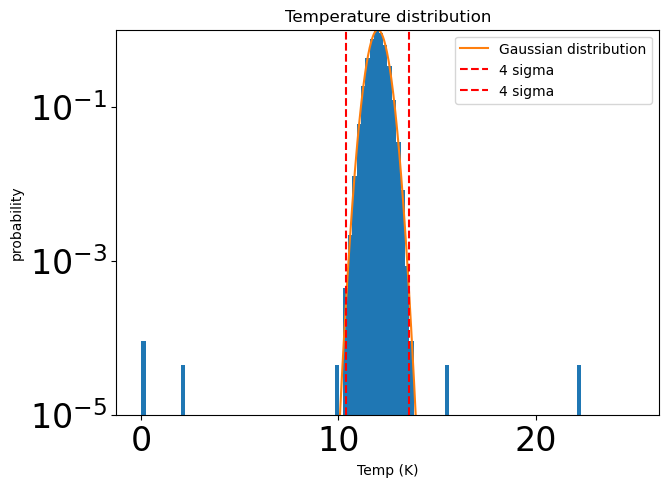

In [20]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, loc=12, scale=0.4), label='Gaussian distribution')
                
plt.yscale('log')
plt.ylim(10e-6,1)
plt.axvline(stats.norm.ppf(stats.norm.sf(4), loc=12, scale=0.4), label='4 sigma', c = 'r', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(-4), loc=12, scale=0.4), label='4 sigma', c = 'r', linestyle='--')
plt.title('Temperature distribution')
plt.xlabel('Temp (K)')
plt.ylabel('probability')
plt.legend()
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()


The the pdf of temperature follows a Gaussian distribution. By plotting the lines for 4 sigma we can say that most of the good data lies within the 4 sigma of the distribution 

#### 2. State the statistical question in words

How many temperature points lie a certain distance away from the mean temperature.
As most of the bad data lies away from the central distribution we will discard the data from a certain distance from the temperature of the center of the distribution.


#### 3. Restate your question in math. Be very clear.

Is the probability that the background produces my data greater than 4 sigma when the probability distribution function for the temperatures is a Gaussian distribution with a mean temperature of 12 K and a standard deviation of .4?

#### No. of good data points: 1000

##### percent that lie within 4 sigma

In [4]:
p1 = stats.norm.cdf(4)

In [5]:
p2 = stats.norm.cdf(-4)

In [6]:
p1 - p2

0.9999366575163338

##### Number that lie within 4 sigma of the mean

In [7]:
(p1 - p2) * 1000

999.9366575163338

##### number that lie beyond 4 sigma:

In [8]:
1000 - 999.9366575163338


0.06334248366624706

#### No. of bad data points :  (10, 10.3, 2.1, 0, 0, 15.6, 22.3, 12.7) :  8

##### sigma value of 10:

In [9]:
v = stats.norm.sf(10, loc = 12, scale = .4)

In [10]:
stats.norm.isf(v)

-4.999999999970176

##### sigma value of 10.3:

In [11]:
v = stats.norm.sf(10.3, loc = 12, scale = .4)
v

0.9999893114742251

In [12]:
stats.norm.isf(v)

-4.250000000000626

##### sigma value of 2.1:

In [13]:
v = stats.norm.sf(2.1, loc = 12, scale = .4)

In [14]:
stats.norm.isf(v)

-inf

##### sigma value of 0:

In [15]:
v = stats.norm.sf(0, loc = 12, scale = .4)

In [16]:
stats.norm.isf(v)

-inf

##### sigma value of 15.6:

In [10]:
v = stats.norm.sf(15.6, loc = 12, scale = .4)
stats.norm.isf(v)

8.999999999999998

##### sigma value of 22.3:

In [11]:
v = stats.norm.sf(22.3, loc = 12, scale = .4)
stats.norm.isf(v)

25.750000000000004

##### sigma value of 12.7:

In [12]:
v = stats.norm.sf(12.7, loc = 12, scale = .4)
stats.norm.isf(v)

1.7499999999999984

##### Number that lie within 4 sigma : 1

##### Number that lie beyond 4 sigma : 7

#### 4.

For the test to be good the probability of the data had to correspond to less than 4 sigma. Out of 1000 good data 999.9366575163338 data points were less than 4 sigma thus were considered good, 0.06334248366624706 data points wew more than 4 sigma thus were considered bad. Out of 8 bad data points 1 was less than 4 sigma thus were wrongly considered good, 7 were greater than 4 sigma thus were considered bad.

|      | True T | Bad T |
| --- | --- | --- |
| Your Test Good | 999.9366575163338 | 1 |
| Your Test Bad | 0.06334248366624706 | 7 |

#### 1B)

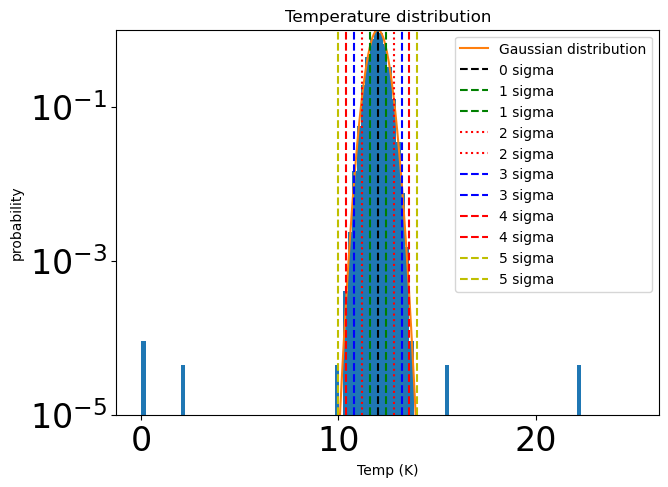

In [21]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, loc=12, scale=0.4), label='Gaussian distribution')
                
plt.yscale('log')
plt.ylim(10e-6,1)

plt.axvline(stats.norm.ppf(stats.norm.sf(0), loc=12, scale=0.4), label='0 sigma', c = 'k', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(1), loc=12, scale=0.4), label='1 sigma', c = 'g', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(-1), loc=12, scale=0.4), label='1 sigma', c = 'g', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(2), loc=12, scale=0.4), label='2 sigma', c = 'r', linestyle=':')
plt.axvline(stats.norm.ppf(stats.norm.sf(-2), loc=12, scale=0.4), label='2 sigma', c = 'r', linestyle=':')
plt.axvline(stats.norm.ppf(stats.norm.sf(3), loc=12, scale=0.4), label='3 sigma', c = 'b', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(-3), loc=12, scale=0.4), label='3 sigma', c = 'b', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(4), loc=12, scale=0.4), label='4 sigma', c = 'r', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(-4), loc=12, scale=0.4), label='4 sigma', c = 'r', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(5), loc=12, scale=0.4), label='5 sigma', c = 'y', linestyle='--')
plt.axvline(stats.norm.ppf(stats.norm.sf(-5), loc=12, scale=0.4), label='5 sigma', c = 'y', linestyle='--')
plt.title('Temperature distribution')
plt.xlabel('Temp (K)')
plt.ylabel('probability')
plt.legend()
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

As you can see from the plot most of the data lie for a sigma of 0. The number of omissions decreases with the increase statistical threshold.the percentage of omissions of good data for every sigma value is predictable.The number of omissions depends on the number of good data.

The percentage of good data omitted for a 4 sigma threshold is 0.0006334248366624706
for 1000 good data the number of data omitted: 0.06334248366624706




#### 1C)

There was 1 mistake of commission the value 12.7. It could be eliminated with a threshold of 2 sigma however, that would lead to omission of many good data thus would not be a good trade off

## Problem 2:


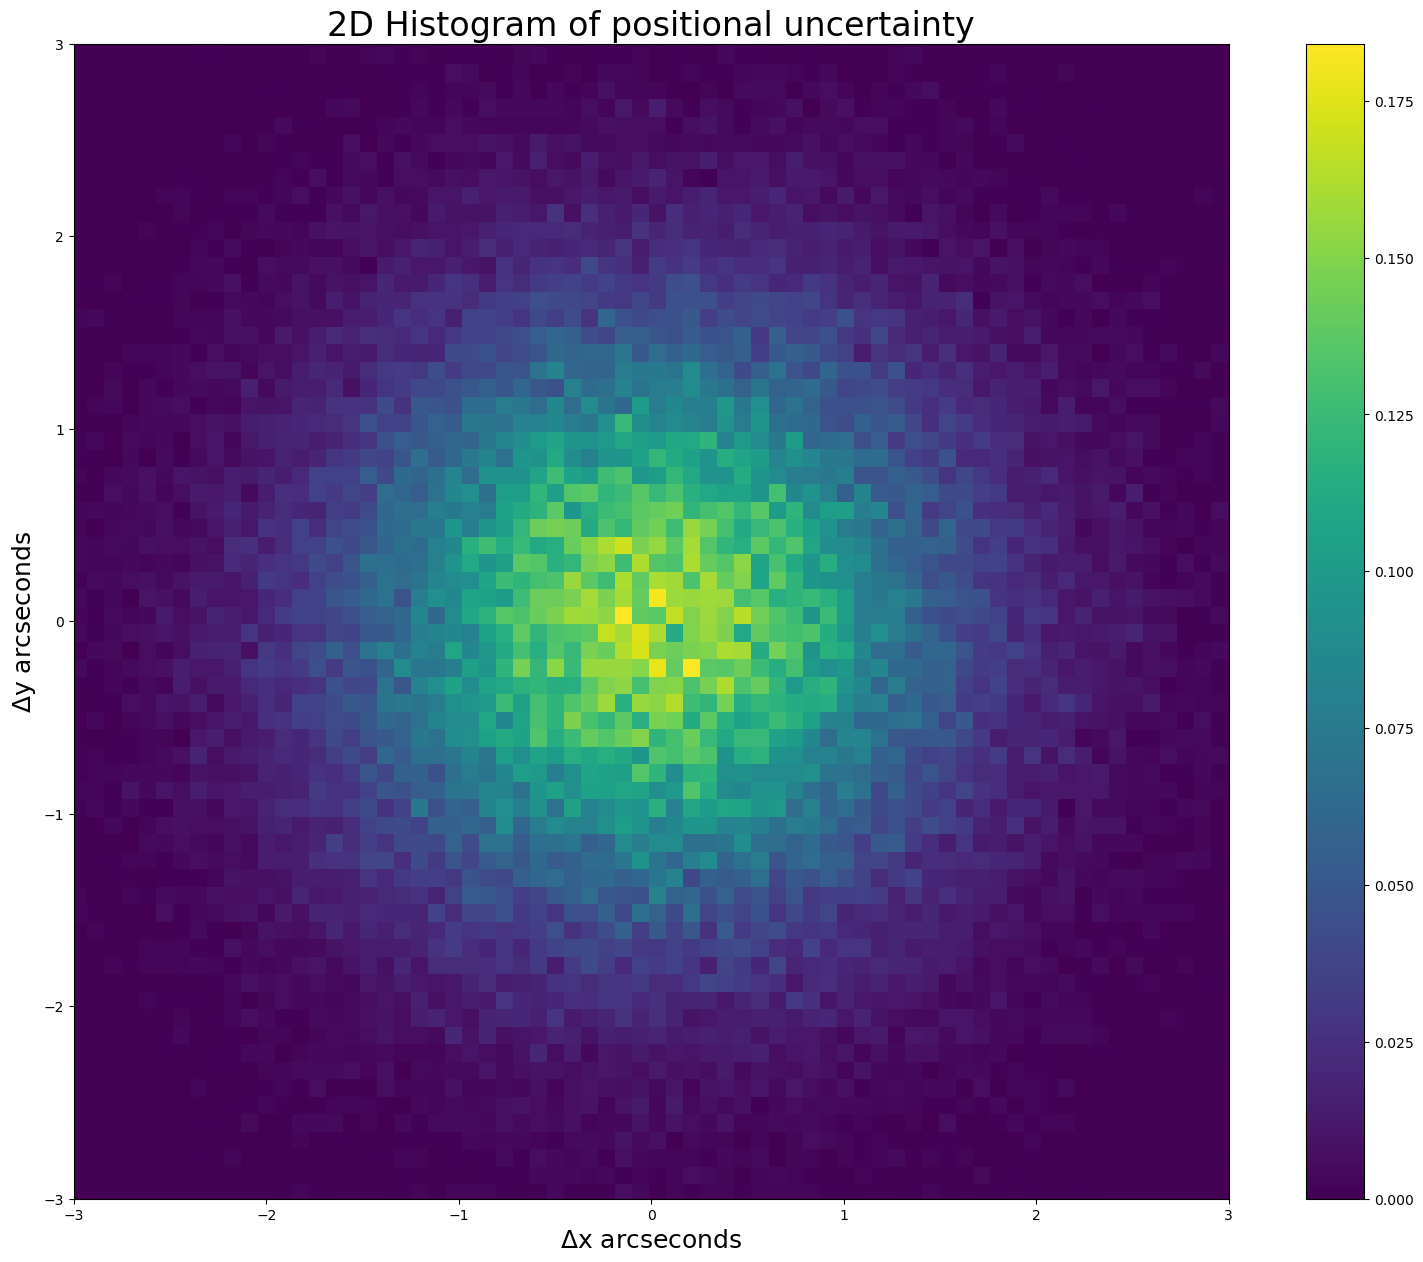

In [17]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### 1.What is the question in words?

For what distance is the movement of a star considered significant

#### 2. What is the question in math?

The distance of the movement is same as the amplitude of the position of the star Xi + Yj. We know that the pdf of amplitude of Gaussians of zero mean and sigma_squared variance is Rayleigh Distribution with shape parameter sigma.Thus we have to find the point on the rayleigh function that has a probability corresponding to a sigma value of 5.

#### 3. What distance in arcseconds represents a 5 sigma detection of motion?

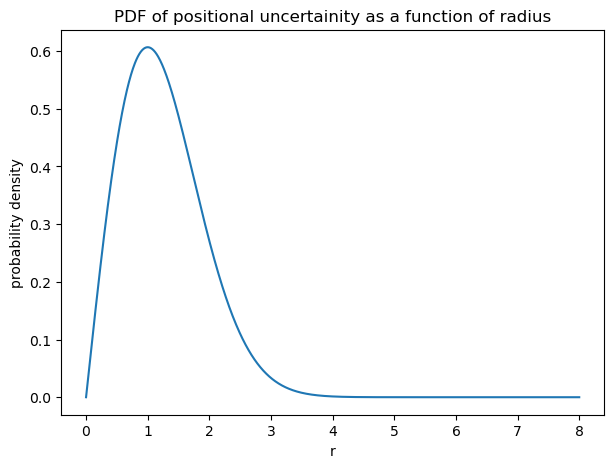

In [18]:
d = stats.rayleigh.pdf(np.linspace(0,8,1000))
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1)
plt.title('PDF of positional uncertainity as a function of radius')
plt.xlabel('r')
plt.ylabel('probability density')
ax.plot( np.linspace(0,8,1000),d)

In [19]:
 stats.norm.cdf(5)

0.9999997133484281

In [20]:
stats.rayleigh.ppf(0.9999997133484281)

5.489079776034238

a distance of movement of 5.489079776034238 for a star considered significant

## Problem 3

#### 1.What is the question in words?

What would be the probability that our background produces the given number of signals or less?

#### 2.Translate the question to math, describing both the expected background pdf() and the integral you need to do.

The Poisson random variable satisfies the following conditions:

1.The number of successes in two disjoint time intervals is independent.

2.The probability of a success during a small time interval is proportional to the entire length of the time interval.

Thus we can say that the pdf() of the number of signals produced by the background has a poisson distribution with the mean of 7200 signals. Since it's a discrete distribution,to get the probability of getting 6800 signals or less we sum all the values upto that point. 

#### 3.Convert to sigma.

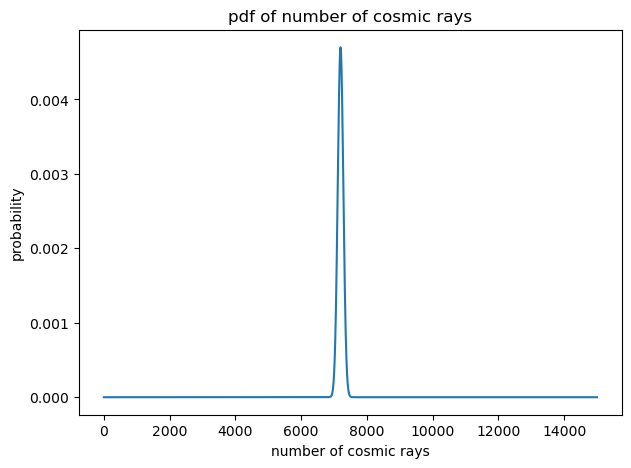

In [22]:
mu = 7200
x = np.arange(0, 15000)
plt.plot(x, stats.poisson.pmf(x, mu))
plt.title('pdf of number of cosmic rays')
plt.xlabel('number of cosmic rays')
plt.ylabel('probability')
plt.show()

In [23]:
sum(stats.poisson.pmf(x, mu)[:6800])

9.548184551554207e-07

The probability of the background producing 6800 or fewer cosmic rays during the observation is 9.548184551554207e-07

In [24]:
stats.norm.ppf(9.548184551554207e-07)

-4.762759176740926

The probability of 9.548184551554207e-07 gives a value of 4.76 sigma